# ¿Qué variables destacadas influyen en el precio de las viviendas?

In [1]:
# Librerias
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

# This line is needed to display plots inline in Jupyter Notebook
#%matplotlib inline

## Introduccion

**Contexto comercial.** El negocio inmobiliario moderno está cada vez más dominado por grandes cantidades de datos. La inversión inmobiliaria requiere un buen juicio y una predicción precisa del precio para determinar si una propiedad es una inversión adecuada. Dada la naturaleza ilíquida de las inversiones inmobiliarias, existen una serie de complicaciones que pueden surgir al fijar el precio de una propiedad. Por lo tanto, es de gran interés para los inversionistas inmobiliarios comprender qué variables afectan los precios de las viviendas para que puedan planificar sus carteras de inversión con mayor claridad y confianza. Recientemente se unió a la división de crecimiento de la vivienda en una corporación multinacional y se le ha asignado la tarea de identificar los factores que afectan los precios de la vivienda.

**Problema empresarial.** Su tarea es responder a la siguiente pregunta: **"¿Qué variables son las más importantes para predecir los precios de las viviendas?"**

**Contexto analítico.** El caso procederá de la siguiente manera: 1) exploraremos los datos para obtener una idea de las características útiles; 2) aplicaremos la regularización L1 para reducir el número de variables en su modelo lineal inicial; 3) aplicar la regularización L2 para lidiar con la multicolinealidad y reducir aún más el conteo de variables; y finalmente 4) usaremos la regularización L1 y L2 juntas a través de la regresión de red elástica para obtener los beneficios de ambos en un modelo.

## Entendiendo los datos de Saratoga 

Tenemos cerca de 15 variables para predecir el ```price``` de las viviendad

Cantidad de interes:
1. price (millions of US dollars)

Variables Numericas no-categoricas:
1. **lotSize**: size of the lot in acres
2. **age**: age of the house in years
3. **landValue**: value of the land in US dollars
4. **livingArea**: living area in square feet
5. **pctCollege**: percent of the neighborhood that graduated college

Variables Numericas categoricas:
1. **bedrooms**: number of bedrooms
2. **fireplaces**: number of fireplaces
3. **bathrooms**: number of bathrooms
4. **rooms**: number of rooms

Variables No-numericas categoricas:
1. **heating**: what type of heating the house uses
2. **fuel**: what type of fuel the house uses
3. **sewer**: what type of sewer system the house has
4. **waterfront**: whether or not the house has a waterfront
5. **newConstruction**: whether or not the house has new construction
6. **centralAir**: whether or not the house has a central air system

In [2]:
#Cargando la data
df = pd.read_csv('saratoga-houses_clean.csv')
df.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,0.132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,0.181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,0.109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,0.155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,0.086060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


## Explorando relaciones entre datos por visualizaciones

Comencemos visualizando la relación entre las variables y los precios de la vivienda a través de diagramas de dispersión 2D, comenzando con las características numéricas no categóricas:

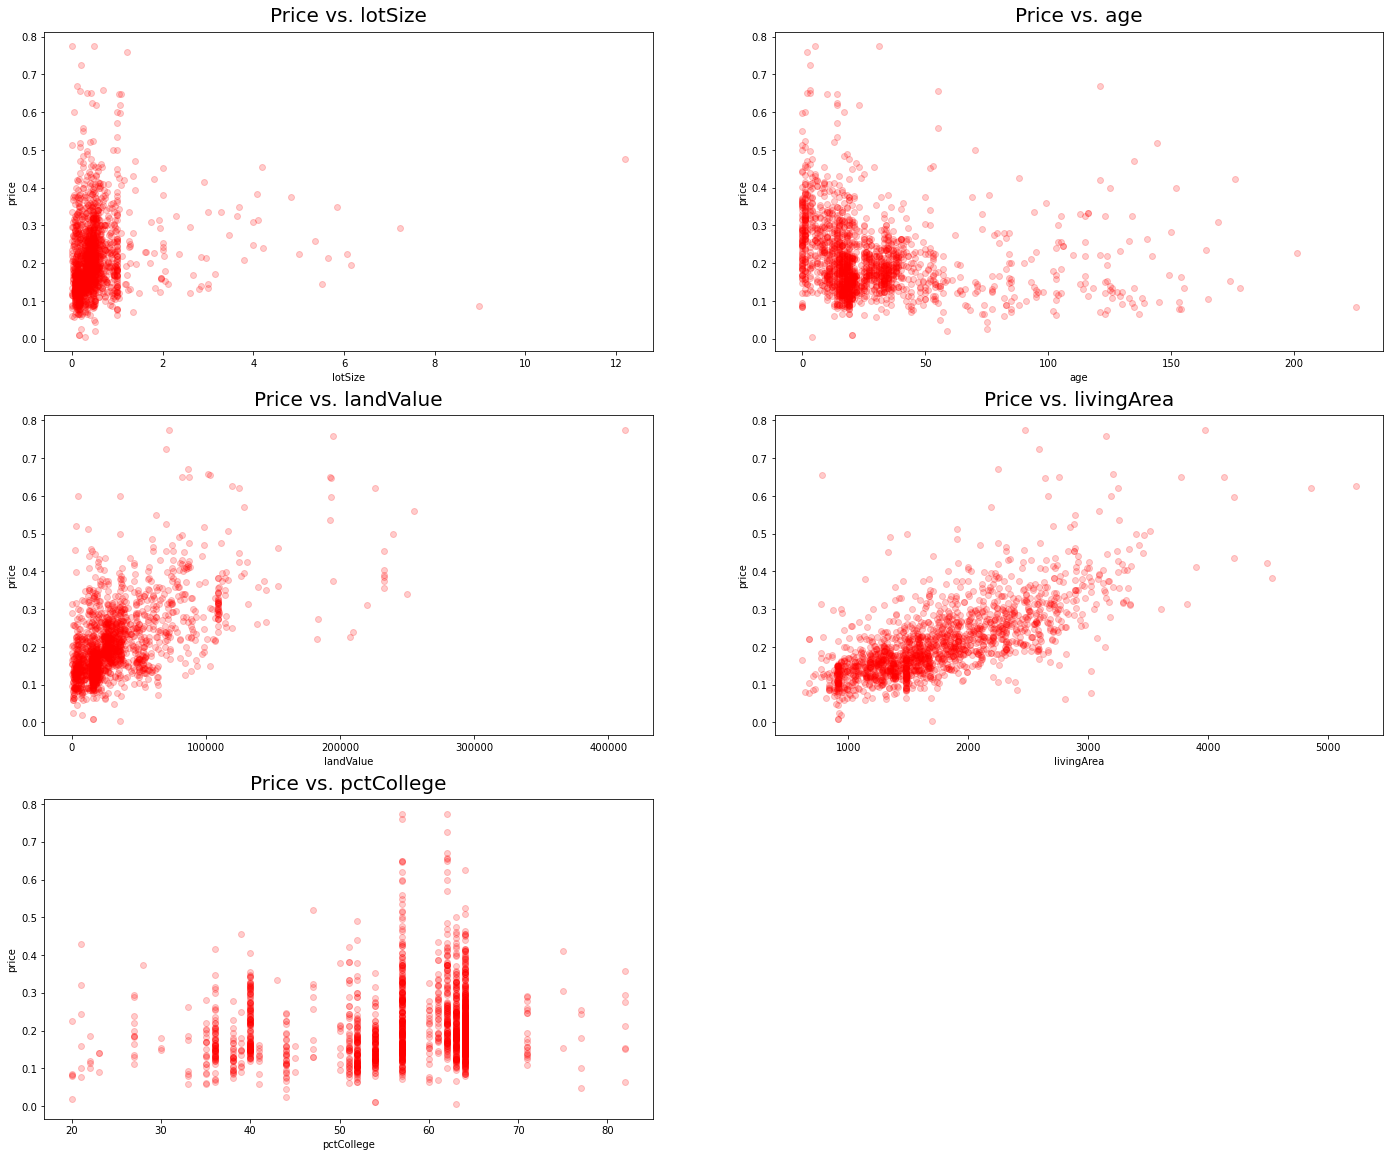

In [3]:
# variables Numericas no-catgoricas
plt.figure(figsize=(24,20))
varstolook = ['lotSize', 'age', 'landValue', 'livingArea', 'pctCollege']
for i,feature in enumerate(varstolook):
    plt.subplot(3,2,i+1)
    colvalues = df[feature]
    plt.scatter(colvalues.values, df.price.values, alpha=0.20, edgecolor=None, color='red')
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title("Price vs. " + feature, fontsize=20, verticalalignment='bottom');

Algunas observaciones son evidentes. Primero, ```livingArea```, ```landValue``` y ```lotSize``` están correlacionados positivamente con los precios de la vivienda. A continuación, la edad de una casa está inversamente correlacionada con el precio hasta unos 50 años, después de lo cual la relación precio-edad se vuelve plana. Curiosamente, la variable ```pctCollege``` muestra grupos alrededor de ciertos porcentajes; sin embargo, no parece haber una relación sólida entre el precio y ```pctCollege```.

Veamos las características categóricas numéricas para ver si podemos notar algún patrón significativo:

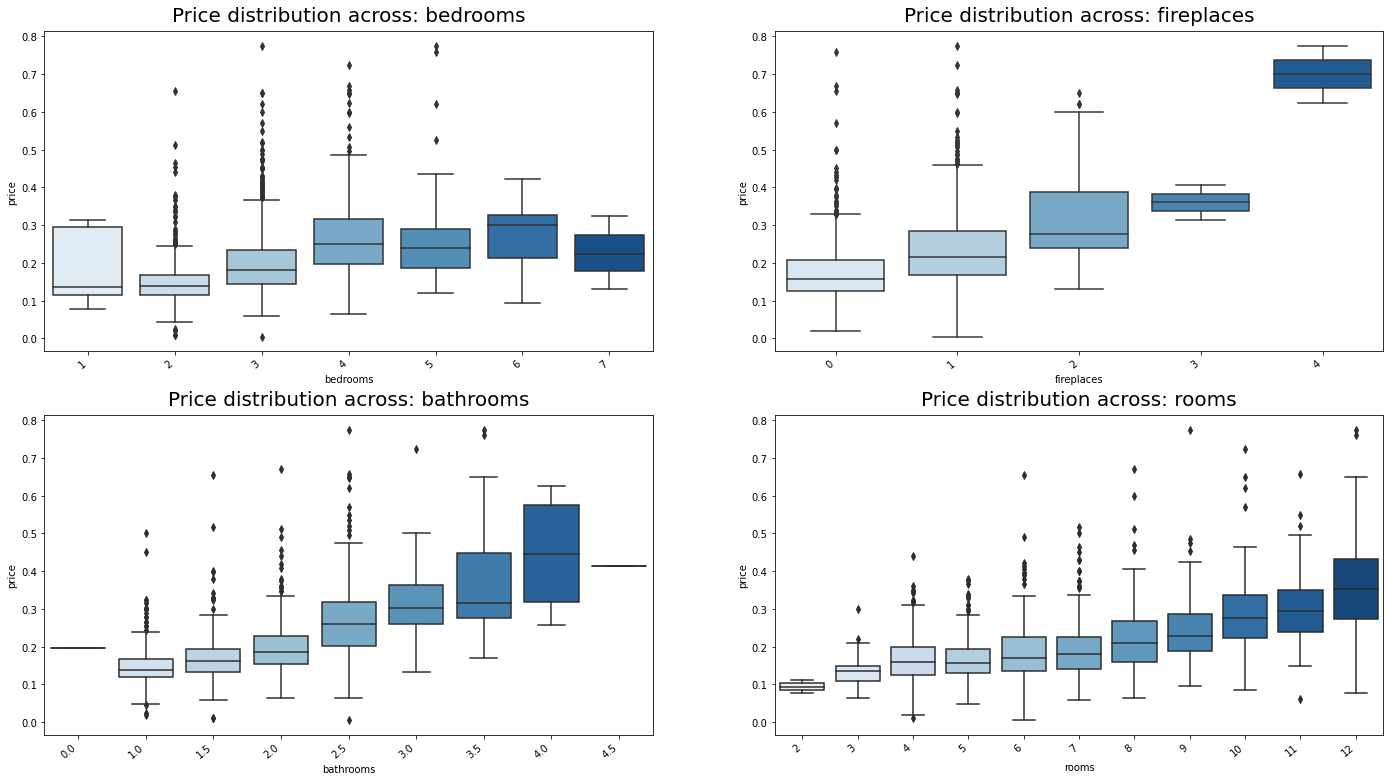

In [4]:
# Variables Numericas categoricas
plt.figure(figsize=(24,20))
varstolook = ['bedrooms', 'fireplaces', 'bathrooms', 'rooms']
for i,feature in enumerate(varstolook):
    plt.subplot(3,2,i+1)
    pl2 = sns.boxplot(x=feature, y = "price", data = df, palette="Blues")
    pl2.set_xticklabels(pl2.get_xticklabels(), rotation=40, ha="right");
    plt.title("Price distribution across: " + feature, fontsize=20, verticalalignment='bottom');

Inmediatamente notamos la fuerte relación que tienen las ```rooms```, ```bathrooms``` y ```fireplaces``` con los precios de las viviendas. Esto se espera ya que las casas más grandes naturalmente tienen más habitaciones y exigen un precio de venta más alto. Con respecto a la característica ```bedrooms```, la tendencia de precios crecientes también está presente a medida que aumenta el número de dormitorios, pero es más débil en un número bajo (1) y alto (7) de dormitorios.

### Ejercicio 1

Cree diagramas de caja para visualizar cada función categórica no numérica frente a los precios de cada valor de categoría dentro de estas variables categóricas. Debe tener seis diagramas con diagramas de caja para cada valor de categoría, uno para cada característica categórica no numérica:

1. `heating`
2. `fuel`
3. `sewer`
4. `waterfront`
5. `newConstruction`
6. `centralAir`

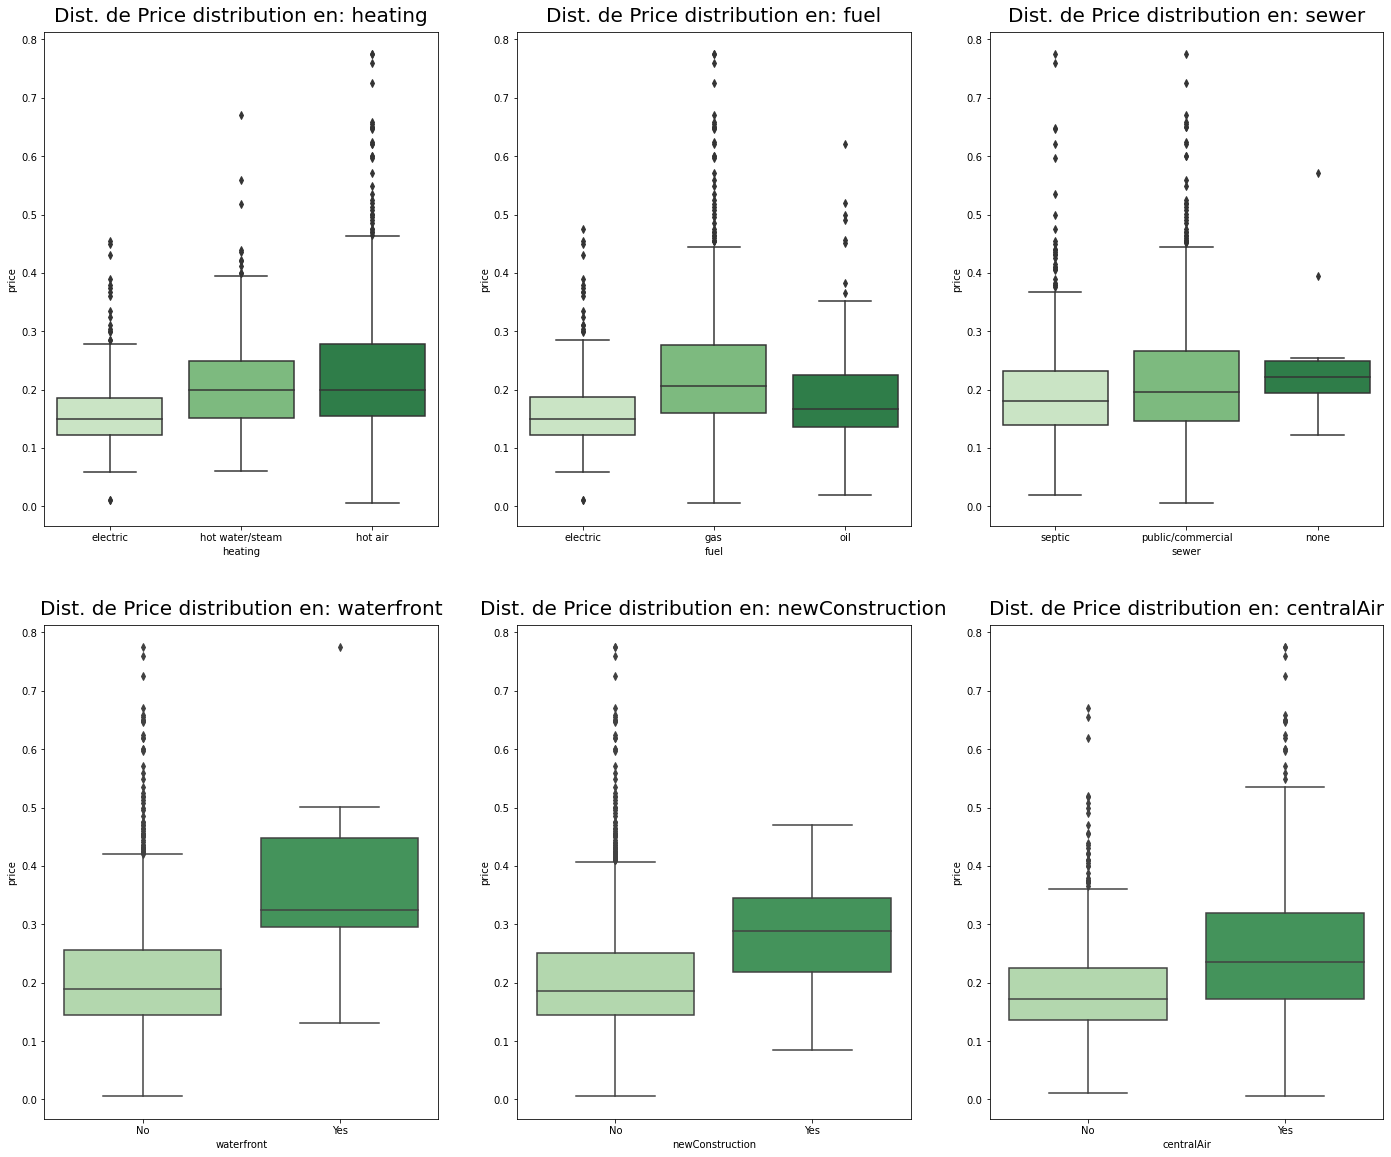

In [7]:
# Asi lo puedo hacer
plt.figure(figsize=(24,20))
varstolook = ['heating', 'fuel','sewer', 'waterfront', 'newConstruction', 'centralAir']
for i,feature in enumerate(varstolook):
    plt.subplot(2,3,i+1)
    pl2 = sns.boxplot(x=feature, y = "price", data = df, palette="Greens")
    pl2.set_xticklabels(pl2.get_xticklabels(), rotation=0, ha="center");
    plt.title("Dist. de Price distribution en: " + feature, fontsize=20, verticalalignment='bottom');

Como era de esperar, una propiedad frente al mar, unidades de nueva construcción y casas con aire acondicionado central van acompañadas de precios más altos. Si bien es más débil, existen algunas diferencias entre las variables de calefacción, combustible y alcantarillado. La calefacción de aire caliente, el combustible de gas y los sistemas de alcantarillado público/comercial cobran precios de vivienda más altos que sus valores categóricos adyacentes.

### Ejercicio 2

Hubo algunas relaciones que no se esperaban, como la débil relación entre ```pctCollege``` y los precios de las viviendas. ¿Cuál de los siguientes puede ser un posible impulsor externo de esta débil relación?

A. Los vecindarios están ubicados cerca de excelentes servicios, lo que eleva todos los precios de las viviendas.

B. Los residentes del vecindario son diversos y tienen una distribución uniforme de niveles de ingresos y educación

C. La gente tiende a vivir en barrios donde viven sus amigos.

D. El procedimiento de recopilación de datos para ```pctCollege``` se realizó por teléfono

**Respuesta.** (B). La explicación se da a continuación.

La respuesta (A) no lleva inmediatamente a ninguna conclusión sobre por qué existe una relación débil entre el precio de la vivienda y el porcentaje de educación universitaria. Todo lo que (A) implica es que todas las casas tienen un precio más alto debido a la proximidad a servicios atractivos y nada sobre la distribución de esos precios de casas.

La respuesta (B) es la opción ideal, ya que tener residentes diversos en cada vecindario, en términos de ingresos y nivel de educación, conducirá a relaciones débiles al predecir los precios de las viviendas a partir de estas cantidades. Si bien puede ser cierto que los residentes de ingresos más altos poseen viviendas más caras, la variable de porcentaje universitario es relativa a un vecindario, por lo que un efecto promedio debilitará la relación con el precio de cualquier vivienda si el vecindario está bien representado desde el punto de vista educativo.

La respuesta (C) probablemente conduciría a una relación más fuerte entre el porcentaje de precios universitarios y de vivienda si fuera cierto en este conjunto de datos. Los amigos a menudo tienen intereses similares y pueden tener antecedentes educativos similares, lo que podría influir en los porcentajes universitarios promedio del vecindario para que se correlacionen más con los precios de las viviendas.

En cuanto a la respuesta (D), no nos dice nada sobre la relación entre el porcentaje de universidad y el precio, por lo que es incorrecta. Sin embargo, es importante entender que los datos en este caso fueron adquiridos por algún método. Por lo tanto, puede haber errores de datos o sesgos en los datos proporcionados. Si bien no exploraremos los métodos de adquisición de datos en este caso, si los datos se recopilaron por teléfono, sería importante conocer la tasa de respuesta por ubicación para determinar si cada vecindario estuvo igualmente representado.

## Nuestro primer modelo

### Preparando la data

Antes de comenzar a modelar los datos, hagamos algunas transformaciones simples. Primero, transformemos las variables categóricas con solo dos categorías en valores binarios donde 1 indica que el efecto está presente y cero indica que el efecto no está presente. Esto permitirá una fácil estandarización de cada característica presente en los datos:

In [8]:
# Encoding para variables categoricos no numericos
df2 = pd.get_dummies(df, columns=['heating', 'fuel'], drop_first=False)
df2 = pd.get_dummies(df2, columns=['sewer'], drop_first=True)
df2.replace({'waterfront': {"No":0, "Yes":1},
             'newConstruction': {"No":0, "Yes":1},
             'centralAir': {"No":0, "Yes":1}}, inplace=True)

In [10]:
df2.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,...,newConstruction,centralAir,heating_electric,heating_hot air,heating_hot water/steam,fuel_electric,fuel_gas,fuel_oil,sewer_public/commercial,sewer_septic
0,0.132500,0.09,42,50000,906,35,2,1,1.0,5,...,0,0,1,0,0,1,0,0,0,1
1,0.181115,0.92,0,22300,1953,51,3,0,2.5,6,...,0,0,0,0,1,0,1,0,0,1
2,0.109000,0.19,133,7300,1944,51,4,1,1.0,8,...,0,0,0,0,1,0,1,0,1,0
3,0.155000,0.41,13,18700,1944,51,3,1,1.5,5,...,0,0,0,1,0,0,1,0,0,1
4,0.086060,0.11,0,15000,840,51,2,0,1.0,3,...,1,1,0,1,0,0,1,0,1,0


A continuación, dividamos los datos en un conjunto de entrenamiento y un conjunto de prueba. Elegimos retener el 25 por ciento de los datos como datos de prueba:

In [11]:
# Separando para regresion
X = df2.drop(['price'], axis=1)
y = df2[['price']].values.ravel()

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Finalmente, vamos a normalizar los datos. Como hemos visto con los algoritmos de agrupamiento, las escalas inconsistentes entre las variables pueden afectar negativamente el rendimiento de varias técnicas de aprendizaje automático. Resulta que la regularización es una de esas técnicas (discutiremos esto más adelante):

In [12]:
# Obtener la media dy sd de train
training_mean = X_train.mean()
training_std =  X_train.std()

# Normalizar la data (practica comun cuando usas tecnicas de regularizacion)
X_train = (X_train - training_mean) / training_std #Usamos train por ser generalizable
X_test = (X_test - training_mean) / training_std #Usamos train por ser generalizable

### Ajustar modelo de regresion multiple

Comencemos con un modelo de regresión lineal simple usando todas las características dadas:

In [13]:
# Ajustar el modelo
model_linear = sm.OLS(y_train, sm.add_constant(X_train))
original_linear = model_linear.fit()
print(original_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.22e-282
Time:                        12:24:39   Log-Likelihood:                 1838.2
No. Observations:                1296   AIC:                            -3638.
Df Residuals:                    1277   BIC:                            -3540.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Aquí, vemos que las características de calefacción, combustible y alcantarillado no son estadísticamente significativas, mientras que las variables de área habitable, valor de la tierra, frente al mar y nueva construcción son significativas. Estos resultados son consistentes con la fuerza de las relaciones que observamos en nuestras visualizaciones de datos anteriores.

## Como la regularizacion ayuda al modelo?

Ya hemos mencionado brevemente la **regularización** y cómo es una especie de "penalización" por tener demasiadas variables inútiles en un modelo. Tu objetivo es mejorar las predicciones del modelo fuera de la muestra al reducir la complejidad del modelo y evitar el sobreajuste. Un modelo equilibrado solo usará la complejidad suficiente para capturar la tendencia general de los datos; es decir, el número mínimo de parámetros del modelo posibles para obtener un ajuste aceptable.

Motivados por la gran cantidad de variables insignificantes presentes en la regresión, nos gustaría reducir nuestra posibilidad de sobreajuste y eliminar algunas de las variables menos útiles. Emplearemos una herramienta llamada **regularización L1** para ayudarnos en este objetivo.

### Aplicar feature selection LASSO 

Un modelo de regresión que utiliza la regularización L1 se denomina modelo de regresión **LASSO (Operador de selección y contracción mínima absoluta- Least Absolute Shrinkage and Selection Operator)**. La regularización L1 agrega la magnitud absoluta de los coeficientes del modelo de regresión ($\beta_j$) a la función de pérdida de mínimos cuadrados ordinarios (OLS), multiplicada por un término de escala $\lambda$:


$$\sum_{i=1}^N{\big(y_i - \sum_{j=1}^p{x_{ij}\beta_j}}\big)^2 + \color{red}{\lambda \sum_{j=1}^{p}\big| \beta_j \big|} .$$

Recuerde que la regresión lineal múltiple busca minimizar la función objetivo $Loss(Data\ |\ Model)$, donde la pérdida generalmente se define como la diferencia al cuadrado entre los valores de $y$ predichos y verdaderos (en este caso, $y$ son los precios de la vivienda ). Extender la regresión lineal múltiple para usar la regularización L1 requiere agregar un término adicional ${\lambda \sum_{j=1}^{p}\big| \beta_j \big|}$ para penalizar la mayor complejidad del modelo.

La regularización L1 reduce los coeficientes $\beta_j$ hacia cero, ya que cualquier $\beta_j$ grande aumentará en gran medida la función objetivo anterior, que buscamos minimizar. El valor de $\lambda$ establece la fuerza de la regularización: los valores más grandes de $\lambda$ afectarán cada vez más a los coeficientes $\beta_j$.

Ajustemos una regresión lineal múltiple con un término de regularización L1. En el método ```linear_model.Lasso()```, la notación ```alpha``` se refiere al valor $\lambda$ que definimos arriba. Primero elegimos un $\lambda$ pequeño para realizar solo una regularización débil. Si alguno de los coeficientes se establece en cero bajo esta regularización débil, entonces existe una buena posibilidad de que no sea significativo para las predicciones de precios de la vivienda.

In [14]:
# Ajustar el modelo L1
model_l1 = linear_model.Lasso(alpha=0.00001, fit_intercept=True) # higher alpha for stronger regularization
results_l1 = model_l1.fit(X_train, y_train)

A continuación se muestran los nombres de los coeficientes del modelo seguidos de los valores $\beta$ de ajuste. Los coeficientes están ordenados de menor a mayor para facilitar la visualización. Estamos buscando los coeficientes que son aproximadamente cero, ya que esto indica que la regularización L1 ha eliminado estas características de la predicción:

In [15]:
sorted(zip(X_train.columns, results_l1.coef_), key=lambda x: x[1])

[('sewer_public/commercial', -0.013232781041673554),
 ('sewer_septic', -0.01078764887503001),
 ('newConstruction', -0.010751135709249775),
 ('bedrooms', -0.005578301773366263),
 ('age', -0.005197381192771838),
 ('heating_hot water/steam', -0.003271105350930489),
 ('fuel_electric', -0.0013733902247770405),
 ('pctCollege', -0.00011477706533155957),
 ('heating_electric', -0.0),
 ('fuel_oil', -0.0),
 ('fireplaces', 0.0006947901157847505),
 ('heating_hot air', 0.0011599235531580066),
 ('fuel_gas', 0.002415840776398991),
 ('lotSize', 0.003732010644161486),
 ('centralAir', 0.004876517833592989),
 ('rooms', 0.006969691924555492),
 ('waterfront', 0.00972975250165226),
 ('bathrooms', 0.01429092599717739),
 ('landValue', 0.03358163077689344),
 ('livingArea', 0.04421952433968511)]

Los resultados de la regularización L1 muestran que los coeficientes de **calefacción_eléctrica** y **combustible_aceite** son cero. Esta es la idea de la regularización L1 aplicando la selección de características. Es decir, agregar la restricción de complejidad del modelo a la función objetivo ha obligado al procedimiento de ajuste a establecer algunos de los coeficientes en cero (dichos coeficientes los consideramos sin importancia).

Eliminemos estas dos variables en el futuro y ajustemos un modelo de regresión lineal múltiple (sin regularización):

In [16]:
# Reducir el numero de variables basados en reusltados L1
cols_to_drop = ['heating_electric','fuel_oil']
X_train_simplified = X_train.drop(columns=cols_to_drop)
X_test_simplified = X_test.drop(columns=cols_to_drop)

In [17]:
# Reajustar el modelo (no regularization)
model_linear = sm.OLS(y_train, sm.add_constant(X_train_simplified))
res_linear = model_linear.fit()
print(res_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.22e-282
Time:                        12:39:10   Log-Likelihood:                 1838.2
No. Observations:                1296   AIC:                            -3638.
Df Residuals:                    1277   BIC:                            -3540.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Vemos que el nuevo modelo tiene los mismos valores de R-cuadrado (a tres dígitos significativos). Esto es importante ya que indica que al eliminar las dos características **calefacción_eléctrica** y **combustible_aceite**, hemos perdido un poder de predicción insignificante en términos de explicación de la variación en los datos. La simplificación de modelos como este es muy útil en la práctica y puede conducir a una mejor comprensión de los efectos que tiene cada característica en la variable de predicción.

### Ejercicio 3

Reflexionando sobre el uso de L1 anterior, ¿cuál de los siguientes sería un caso útil para la regularización de L1?

A. Tiene datos que exhiben grandes características numéricas

B. Tiene una gran cantidad de funciones y su objetivo es seleccionar una cantidad menor de funciones destacadas.

C. Tiene una pequeña cantidad de características muy importantes

D. Le gustaría evitar el desajuste

**Respuesta.** (B). La explicación se da a continuación.

La respuesta (A) es incorrecta ya que cuando preparamos los datos eliminamos la media de cada característica. Esto se hizo específicamente porque cuando se usa la regularización, la magnitud de los coeficientes $\beta$ es importante. El término agregado para la complejidad del modelo en la función objetivo del modelo funciona mejor cuando las características son todas de magnitud similar, de modo que ninguna característica reciba un tratamiento preferencial en el procedimiento de optimización del ajuste.

La respuesta (B) es correcta y es cómo hemos usado la regularización L1 en este caso. Encontramos dos características cuyos coeficientes se establecieron en cero al agregar una restricción L1 al modelo de regresión múltiple. Por lo tanto, hemos realizado la selección de características.

La respuesta (C) es incorrecta ya que un pequeño número de características muy importantes no indica la necesidad de regularización de L1. La regularización L1 se aplica regularmente para la selección de características para reducir algunos de los coeficientes a cero. Si se sabe que todas las características son muy importantes, la regularización L1 puede no ser la mejor opción.

La respuesta (D) confunde subajuste con sobreajuste. Se aplican técnicas de regularización para evitar el sobreajuste al reducir la complejidad del modelo.

### Identificar multicolinealidad y remover features

A continuación, echemos un vistazo y veamos si la multicolinealidad está presente en las características. Recuerde que la multicolinealidad suele ser una fuente de complejidad innecesaria en un modelo que puede conducir a un ajuste excesivo, por lo que tiene sentido detectarla. Echemos un vistazo a las correlaciones entre las características numéricas no categóricas a través de una matriz de correlación:

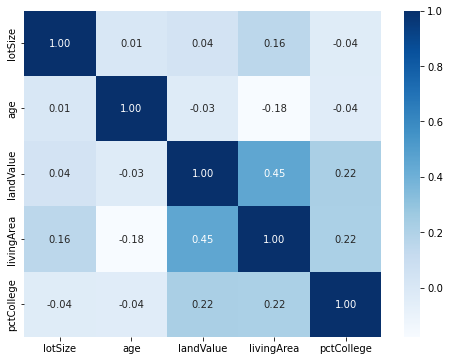

In [18]:
# Matriz de correlacion
features = ['lotSize', 'age', 'landValue', 'livingArea', 'pctCollege']
fig, ax = plt.subplots(figsize=(8,6))
corr = X_train_simplified[features].corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, cmap="Blues", annot=True, fmt=".2f");

La mayoría de las correlaciones que no están a lo largo de la diagonal principal son bajas, pero vemos que existe una correlación considerable entre el valor de la tierra y la superficie habitable. Si bien no es una correlación terriblemente alta de 0.45, esto no es ideal desde el punto de vista de la regresión lineal e indica que existe multicolinealidad.

La regularización L1 a menudo sufre con las predicciones cuando los datos exhiben multicolinealidad ya que el algoritmo de optimización no funciona tan bien. Afortunadamente, existe otro tipo de regularización, la **regularización L2**, que es muy buena para abordar la multicolinealidad. Procedamos a aplicar la regularización L2 al conjunto actual de características.

## Aplicar Regularizacion L2 para lidiar con multicolinealidad

Un modelo de regresión lineal que utiliza la regularización L2 se denomina **regresión Ridge**. La regularización L2 agrega la magnitud al cuadrado de los coeficientes del modelo de regresión ($\beta_j$) a la función de pérdida OLS:

$$\sum_{i=1}^N{\big(y_i - \sum_{j=1}^p{x_{ij}\beta_j}}\big)^2 + \color{red}{\lambda \sum_{j=1}^{p}\beta_j^2} .$$

La regularización L2 también reduce los coeficientes $\beta_j$ hacia cero, sin embargo, los efectos de la reducción suelen ser menores que los de la regresión LASSO. Ajustemos el modelo y examinemos los nuevos coeficientes:

In [19]:
# Ajustar el modelo
model_l2 = linear_model.Ridge(alpha=28.0, fit_intercept=True) # higher alpha for stronger regularization
results_l2 = model_l2.fit(X_train_simplified, y_train)

A continuación se muestran los nombres de los coeficientes del modelo seguidos de los valores $\beta$ de ajuste. Los coeficientes están ordenados de menor a mayor:

In [20]:
sorted(zip(X_train_simplified.columns, results_l2.coef_), key=lambda x: x[1])

[('newConstruction', -0.01009750431707218),
 ('sewer_public/commercial', -0.005645526782576365),
 ('age', -0.005192786144608388),
 ('bedrooms', -0.004616405925118881),
 ('sewer_septic', -0.0033133856339937354),
 ('heating_hot water/steam', -0.002837562657934486),
 ('fuel_electric', -0.0011615800651063823),
 ('pctCollege', 6.581924953498744e-05),
 ('fireplaces', 0.001204279320315348),
 ('heating_hot air', 0.0016736767194721583),
 ('fuel_gas', 0.0022699413825540866),
 ('lotSize', 0.003852235288187124),
 ('centralAir', 0.005066594564126576),
 ('rooms', 0.00771891534068925),
 ('waterfront', 0.009718016717086627),
 ('bathrooms', 0.014790009073400256),
 ('landValue', 0.03313699635793963),
 ('livingArea', 0.041428583014597876)]

Aquí, vemos que ```livingArea``` y ```landValue``` tienen los coeficientes más grandes. Esto era de esperar dado que la exploración de visualización de datos original de este análisis mostró una relación significativa entre estas variables y los precios de la vivienda.

Sin embargo, es importante preguntarse por qué elegimos usar $\lambda = 28.0$ en este ajuste. El valor de $\lambda$ puede afectar significativamente los coeficientes del modelo, por lo que debe elegirse con cuidado. La siguiente sección explora un método para elegir gráficamente un valor $\lambda$ óptimo.

### Mirando los efectos de  $\lambda$ en underfitting y overfitting

El error cuadrático medio (MSE) del modelo se calcula comparando las predicciones del modelo con los valores reales. En este caso, esto significa comparar los precios de la vivienda previstos del modelo regularizado L2 con los precios reales de la vivienda. Los valores más bajos de error cuadrático medio indican un mejor rendimiento del modelo.

Repasamos los valores de $\lambda$ y veamos los efectos en el rendimiento del modelo. Compararemos el rendimiento de los datos de entrenamiento y los datos de prueba. Recuerde que los valores más altos de $\lambda$ conducen a una regularización más fuerte:

In [21]:
# Hacer un loop por distintos valores de lambda
lambdas = np.arange(0.1, 100.0, 0.1)

coefs = []
mse_train = []
mse_test = []
for l in lambdas:
    ridge = linear_model.Ridge(alpha=l, fit_intercept=True)
    ridge.fit(X_train_simplified, y_train)
    mse_train.append(mean_squared_error(y_train, ridge.predict(X_train_simplified))) # train data
    mse_test.append(mean_squared_error(y_test, ridge.predict(X_test_simplified))) # test data

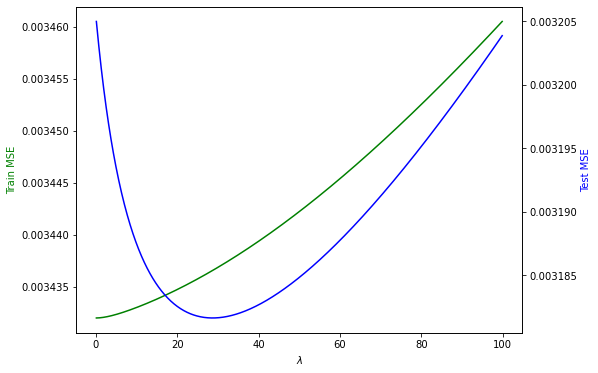

In [22]:
# Grafiquemos los resultados
fig, ax1 = plt.subplots(figsize=(8,6))

ax2 = ax1.twinx()
ax1.plot(lambdas, mse_train, 'g-')
ax2.plot(lambdas, mse_test, 'b-')

ax1.set_xlabel('$\lambda$')
ax1.set_ylabel('Train MSE', color='g')
ax2.set_ylabel('Test MSE', color='b')

plt.show()

Aquí, vemos que el modelo se sobreajusta ligeramente cuando $\lambda$ es pequeño. El MSE de prueba es mucho más alto que el MSE de train y el modelo en su mayoría no está regularizado (es decir, el modelo es una regresión lineal sin términos adicionales en la función de optimización).

El modelo no se ajusta bien cuando $\lambda$ es grande. El efecto de un $\lambda$ grande es aumentar la fuerza de la regularización, lo que efectivamente hace que el modelo esté restringido en cuanto a los coeficientes que puede usar para ajustar los datos. Con un $\lambda$ grande, vemos que el modelo tiene problemas tanto en los datos del train como en los de la prueba (MSE alto tanto para los datos del tren como en los de la prueba), lo que indica que el modelo no se ajusta bien.

Por lo tanto, debemos elegir una lambda que equilibre el ajuste excesivo y el ajuste insuficiente. A partir de la curva MSE de prueba, vemos que el mínimo se alcanza alrededor de $\lambda = 28,0$. Esta fue la motivación para elegir $\lambda$ en la sección anterior. En general, te recomiendo usar un método gráfico de este tipo para comprender los efectos que tiene la regularización en un modelo de regresión múltiple.

### Ejercicio 4

En la regularización L2, a medida que $\lambda$ se acerca a cero, ¿cómo se comportarían las predicciones del modelo de precios de la vivienda? Compare con el caso en el que ajustamos un modelo de regresión lineal múltiple sin regularización.

A. Las predicciones del precio de la vivienda se volverían cada vez más sesgadas

B. Las predicciones del precio de la vivienda se volverían menos resistentes a la multicolinealidad presente en las características

C. Las predicciones del precio de la vivienda no cambian a medida que cambia $\lambda$

D. El modelo se volvería menos complejo, lo que conduciría a una menor variación en las predicciones.

**Respuesta.** (B). La explicación se da a continuación.

Explicación:
La respuesta (A) es incorrecta ya que a medida que $\lambda$ se acerca a cero, esto reduce efectivamente la fuerza de la regularización (eliminando así el sesgo del modelo).

La respuesta (B) es correcta ya que la reducción de $\lambda$ reduce la fuerza de la regularización. La regularización L2 se utiliza principalmente para reducir los efectos de la multicolinealidad mediante el control de la complejidad del modelo. Los valores más altos de $\lambda$ conducen a un modelo más regularizado, por lo que los valores más bajos de $\lambda$ se volverán menos resistentes a la multicolinealidad.

La respuesta (C) es incorrecta ya que las predicciones cambiarán a medida que cambie $\lambda$ ya que la regularización es parte de la función objetivo del modelo. La función objetivo se minimiza durante el ajuste del modelo, y debido a que $\lambda$ es parte del procedimiento de optimización, cambiar su valor también cambiará el modelo resultante y, por lo tanto, cambiará las estimaciones del modelo.

Con respecto a la respuesta (D), la disminución de $\lambda$ conduce a un modelo más complejo. Al aumentar $\lambda$, el modelo se vuelve menos complejo, lo que ayuda a evitar el sobreajuste.

### Ejercicio 5

Ajustamos una regresión lineal múltiple regularizada L2 para predecir los datos de viviendas y observamos cómo el $\lambda$ elegido afecta el train y el error de prueba. También nos gustaría ver cómo los coeficientes se ven afectados por la elección de $\lambda$. Escriba un script para cambiar el valor de $\lambda$ y observe cómo cambian los coeficientes de regresión de Ridge ajustados. Es decir, escriba un guión para producir la siguiente trama. Cada línea de la gráfica corresponde al coeficiente de una sola característica a medida que cambia el valor de $\lambda$.

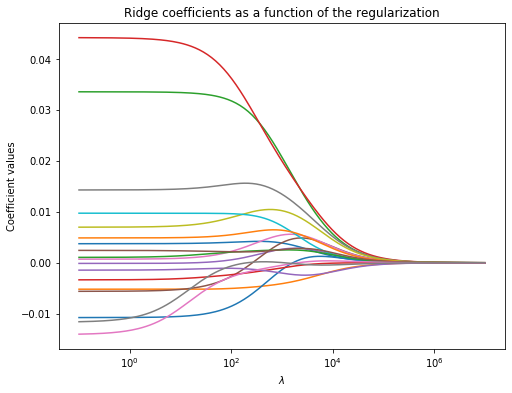

In [19]:
Image("ridge_coef_plot.png", width=500)

Mi solucion !!

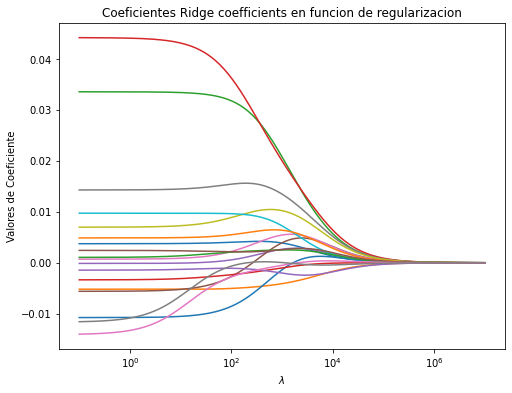

In [23]:
# Iterar sobre distintos valores de lambda 
lambdas = np.logspace(-1, 7, 200)

coefs = []
for l in lambdas:
    ridge = linear_model.Ridge(alpha=l, fit_intercept=True)
    ridge.fit(X_train_simplified, y_train)
    coefs.append(ridge.coef_)

fig,ax = plt.subplots(figsize=(8,6))
ax.plot(lambdas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel('$\lambda$')
plt.ylabel("Valores de Coeficiente")
plt.title('Coeficientes Ridge coefficients en funcion de regularizacion')
plt.axis('tight')
plt.show()
#plt.savefig('ridge_coef_plot.png', bbox_inches='tight')

Cada línea anterior corresponde a la ruta de un coeficiente a medida que $\lambda$ aumenta de izquierda a derecha. Vemos que a medida que aumenta la fuerza de regularización, todos los coeficientes eventualmente se vuelven cero. Este es el efecto de reducción de la regularización, donde un $\lambda$ muy grande obligará a todos los coeficientes del modelo a cero (debido al procedimiento de optimización que minimiza la función objetivo). Hacer que todos los coeficientes lleguen a cero conducirá a un ajuste insuficiente ya que las predicciones del modelo se vuelven demasiado restringidas.

En términos de disminuir $\lambda$ a valores muy pequeños, está claro que los coeficientes del modelo finalmente alcanzan un valor constante para valores pequeños de $\lambda$. Esto ilustra que a medida que $\lambda$ se vuelve pequeño, la regularización esencialmente desaparece y los coeficientes serán los mismos que si no se aplicara ninguna regularización. Dependiendo de los datos, esto podría conducir a un sobreajuste.

Por lo tanto, existe una compensación entre el ajuste excesivo y el ajuste insuficiente al elegir un valor $\lambda$ óptimo. Una $\lambda$ demasiado alta puede no ajustarse correctamente, mientras que una $\lambda$ demasiado baja puede sobreajustarse. Al elegir el $\lambda$ apropiado a través de una cuidadosa observación y análisis, las técnicas de regularización pueden ser una herramienta poderosa para prevenir y controlar el sobreajuste.

## Regularizacion Elastic Net regularization

Ahora que hemos aplicado la regularización L1 y L2 individualmente, ¿hay algún método por el cual podamos obtener sus beneficios juntos? Afortunadamente, los beneficios de escasez de L1 y los beneficios de robustez y prevención contra el sobreajuste de L2 se pueden compartir en un método denominado **Regresión Elastic Net**.

La regularización L1 suma los valores absolutos de las betas a la función objetivo:

$$Loss(Data\ |\ Model) + \color{red}{\lambda \sum_{j=1}^{p}\big| \beta_j \big|} .$$

Por otro lado, la regularización L2 suma las magnitudes al cuadrado de las betas a la función objetivo:

$$Loss(Data\ |\ Model) + \color{red}{\lambda \sum_{j=1}^{p}\beta_j^2} .$$

La red elástica puede ser un método poderoso para fomentar tanto una solución dispersa como una solución robusta frente a características perjudiciales como la multicolinealidad. Dados los datos $(y_1, ..., y_n)$ y las características observadas para cada $y_i$, a saber, $(x_{i1}, ... ,x_{ip})$, un modelo de regresión con $p$ los parámetros $(\beta_0, ..., \beta_p)$ toman la forma,

$$y_i = \sum_{j=1}^{p} x_{ij}\beta_j .$$

La regularización Elastic Net combina las penalizaciones de regularización L1 y L2 para incluir tanto el valor absoluto como la magnitud al cuadrado de los coeficientes beta en la función de pérdida:

$$\sum_{i=1}^{n} (y_i - \sum_{j=1}^{p} x_{ij} \beta_j)^2 + \color{red}{\alpha \rho \sum_{j=1}^{p}\big| \beta_j \big|} + \color{red}{\alpha(1-\rho) \sum_{j=1}^{p}\beta_j^2}.$$


Aquí, $\alpha$ es la tasa de regularización y $\rho$ controla el equilibrio entre la regularización L1 y L2 en la función de pérdida. Es decir, $\rho = 1$ da como resultado una penalización L1 pura, $\rho = 0$ da como resultado una penalización L2 pura, mientras que $0 < \rho < 1$ da como resultado una regularización Elastic Net mixta.

Similar a cómo calibramos $\lambda$ en nuestra discusión sobre la regularización L2, es útil construir gráficos en función de la tasa de regularización elastic Net $\alpha$. Recorramos una lista de diferentes valores de $\alpha$ y tracemos los coeficientes como una función de $\alpha$:

In [24]:
# Iterar sobre distintos valores de alpha
alpha_list = np.logspace(-5, 1, 50)

coefs = []
for a in alpha_list:
    enet = linear_model.ElasticNet(random_state=0, alpha=a, l1_ratio=0.5, fit_intercept=True)
    enet.fit(X_train_simplified, y_train)
    coefs.append(enet.coef_.ravel())

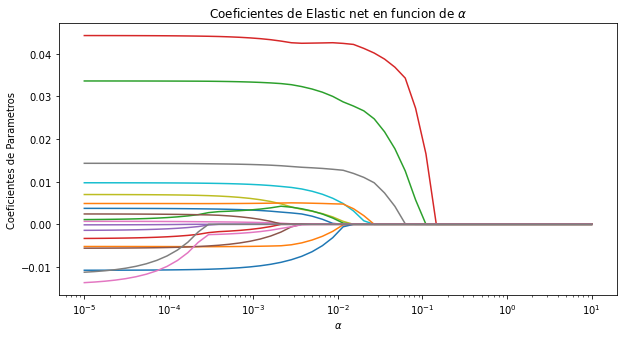

In [25]:
# Plot results
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(alpha_list, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  # reverse axis
plt.xlabel(r'$\alpha$')
plt.ylabel('Coeficientes de Parametros')
plt.title(r'Coeficientes de Elastic net en funcion de $\alpha$')
plt.axis('tight');

De la gráfica anterior, vemos que a medida que $\alpha$ aumenta más allá de ~0.1, todos los coeficientes se vuelven cero. Esto indica que la regularización en tal alfa es demasiado fuerte. Por otro lado, valores de $\alpha$ muy pequeños conducen a una regularización débil. Podemos ver que a medida que los valores de $\alpha$ disminuyen de derecha a izquierda, las estimaciones de los parámetros comienzan a verse afectadas de manera más significativa cerca de $10^{-4}$. Esto indica que en ese punto la regularización comienza a tener un efecto en el ajuste del modelo.

Ahora que tenemos una idea de cómo los coeficientes se ven afectados por $\alpha$, echemos un vistazo a cómo elegir el valor óptimo de $\alpha$.

### Un metodo para elegir el valor optimo de  $\alpha$ 

Elegir un $\alpha$ óptimo es importante. Si elige un $\alpha$ que sea demasiado grande, los coeficientes del modelo estarán demasiado restringidos y se reducirá la precisión del modelo fuera de la muestra. Por otro lado, elegir un $\alpha$ que sea demasiado pequeño puede resultar en que la regularización tenga poco efecto, reduciendo así el propósito principal de la regularización como control contra el sobreajuste.

Un método para seleccionar un $\alpha$ óptimo es observar el R-cuadrado del modelo como una función de $\alpha$ y, posteriormente, seleccionar el $\alpha$ que proporcione el valor más alto de R-cuadrado del conjunto de prueba. Ajustemos el modelo de regresión lineal ElasticNet para diferentes valores de $\alpha$ y veamos los efectos en el R-cuadrado para los conjuntos de entrenamiento y prueba. Tenga en cuenta que estableceremos la relación de regularización L1 y L2 (indicada como el parámetro `l1_ratio` en `linear_model.ElasticNet()`, y a menudo indicada matemáticamente como $\rho$) en 0,5 en este análisis, con la idea de equilibrar Efectos de regularización L1 y L2:

In [26]:
# Comparar la progresion del train y los errore sde test errors a medida que alpha varia
alphas = np.logspace(-5, 1, 50)
enet = linear_model.ElasticNet(random_state=0, l1_ratio=0.5, fit_intercept=True)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train_simplified, y_train)
    train_errors.append(enet.score(X_train_simplified, y_train))
    test_errors.append(enet.score(X_test_simplified, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Valor optimo de alpha como parametro regularizacion : %.6f" % alpha_optim)

# Estimar el coef_ optimo
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, y).coef_

Valor optimo de alpha como parametro regularizacion : 0.000518


Veamos cómo evoluciona el R-cuadrado de los datos de entrenamiento y prueba a medida que se cambia el parámetro $\alpha$:

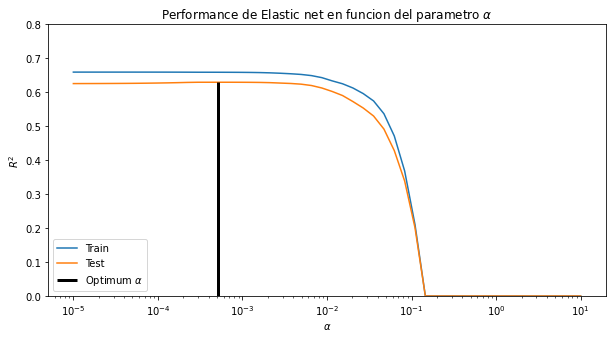

In [27]:
# Graficar el R2 en funcion de alpha
fig,ax = plt.subplots(figsize=(10,5))
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',linewidth=3, label=r'Optimum $\alpha$')
plt.legend(loc='lower left')
plt.ylim([0, 0.8])
plt.title(r'Performance de Elastic net en funcion del parametro $\alpha$')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$R^2$');

El valor optimo de $\alpha$ es ~0.0005.

### Ejercicio 6

Al elegir un $\alpha$ óptimo, dividimos los datos en dos conjuntos, entrenamos y probamos. El conjunto de trenes se usó para ajustar el modelo de regresión lineal regularizado de red elástica, mientras que el conjunto de prueba se usó para calcular el R-cuadrado para cada valor diferente de $\alpha$. ¿Cuál es la razón principal de dividir en datos de entrenamiento y prueba al elegir un $\alpha$ óptimo para esta tarea de regresión de red elástica?

(A) Al elegir $\alpha$ utilizando datos de la muestra, reducimos el riesgo de sobreajuste

(B) La complejidad del modelo disminuye, lo que conduce a una menor probabilidad de sobreajuste

(C) Para ayudar en la precisión de la predicción del modelo fuera de la muestra, $\alpha$ se selecciona usando los datos de prueba que no están involucrados en el proceso de ajuste

(D) Dado que $\alpha$ es una sola variable para optimizar, la división en tren y prueba reduce el tiempo de cálculo y ayuda en el desarrollo del modelo.


**Respuesta.** (C). La explicación se da a continuación.

La respuesta (A) es incorrecta ya que elegimos $\alpha$ usando datos de prueba fuera de la muestra, no los datos del tren dentro de la muestra que se usaron para ajustar el modelo lineal.

La respuesta (B) es incorrecta ya que la complejidad del modelo no disminuye al dividirse en conjuntos de entrenamiento y prueba. La complejidad del modelo permanece sin cambios, ya que los datos en los que se ajusta o prueba el modelo no están involucrados en la determinación de la complejidad del modelo.

La división en datos de entrenamiento y prueba nos permite ajustar utilizando los datos de la muestra y luego probar los datos fuera de la muestra para garantizar que el modelo no se sobreajuste. Por lo tanto, al seleccionar $\alpha$ usando los datos de prueba que no están involucrados en el ajuste del modelo (por lo tanto, datos de prueba fuera de la muestra), esto ayuda a tener una mejor precisión de predicción fuera de la muestra. Por lo tanto, la respuesta (C) es la respuesta correcta.

Aunque la división en datos de entrenamiento y prueba puede reducir los tiempos de entrenamiento en el desarrollo del modelo, esta no es una razón por la que dividimos los datos de entrenamiento y prueba para elegir un $\alpha$ óptimo. Por lo tanto, la respuesta (D) es incorrecta.

### Ejercicio 7

Escriba un script para cambiar $\rho$ y vea cómo cambia el $\alpha$ óptimo (basado en el conjunto de prueba máximo R-cuadrado como se ve arriba). Es decir, ¿cuáles son los valores óptimos de $\alpha$ usando para los siguientes valores de $\rho$: [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]? Comente qué sucede cuando $\rho$ es 0 y cuando $\rho$ es 1.

Mi solucion

In [28]:
# Comparar la progresion del train y los errores de test errors a medida que rho varia
alphas = np.logspace(-5, 1, 50)
rhos = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
list_alpha_optim = []
for rho in rhos:
    train_errors = []
    test_errors = []
    enet = linear_model.ElasticNet(random_state=0, l1_ratio=0.5, fit_intercept=True)
    for alpha in alphas:
        enet.set_params(alpha=alpha, l1_ratio=rho)
        enet.fit(X_train_simplified, y_train)
        train_errors.append(enet.score(X_train_simplified, y_train))
        test_errors.append(enet.score(X_test_simplified, y_test))

    i_alpha_optim = np.argmax(test_errors)
    alpha_optim = alphas[i_alpha_optim]
    print("Optimal alpha for rho = %.6f: %.6f" % (rho, alpha_optim))
    list_alpha_optim.append(alpha_optim)

Optimal alpha for rho = 0.100000: 0.002121
Optimal alpha for rho = 0.200000: 0.001207
Optimal alpha for rho = 0.300000: 0.000910
Optimal alpha for rho = 0.400000: 0.000687
Optimal alpha for rho = 0.500000: 0.000518
Optimal alpha for rho = 0.600000: 0.000518
Optimal alpha for rho = 0.700000: 0.000391
Optimal alpha for rho = 0.800000: 0.000391
Optimal alpha for rho = 0.900000: 0.000295


Encontramos que el alfa óptimo disminuye a medida que aumenta $\rho$.

## Insights del modelo final elastic net

Para predecir los precios de las viviendas con una porción equilibrada de regularización L1 y L2, encontramos un $\alpha = 0.000518$ óptimo para usar en el modelo de red elástica. Echemos un vistazo a los resultados de nuestro modelo final y veamos si hay alguna idea que podamos extraer:


In [29]:
# Miremos los coeficientes del modelo final
final_elastic_net_model = linear_model.ElasticNet(random_state=0, alpha=0.000518, l1_ratio=0.5, fit_intercept=True)
final_elastic_net_model.fit(X_train_simplified, y_train)
sorted(zip(X_train_simplified.columns, final_elastic_net_model.coef_), key=lambda x: x[1])

[('newConstruction', -0.01032689222658409),
 ('age', -0.00521669164615804),
 ('bedrooms', -0.004675685635988088),
 ('sewer_public/commercial', -0.002246222923318455),
 ('heating_hot water/steam', -0.0015928929103743324),
 ('pctCollege', -0.0),
 ('fuel_electric', -0.0),
 ('sewer_septic', -0.0),
 ('fireplaces', 0.0005434853927543259),
 ('fuel_gas', 0.001967178310464714),
 ('heating_hot air', 0.0030686697632882507),
 ('lotSize', 0.003513891569413089),
 ('centralAir', 0.004870730698973052),
 ('rooms', 0.0064860340858468295),
 ('waterfront', 0.009525337302894229),
 ('bathrooms', 0.014121489970889516),
 ('landValue', 0.03345216803179955),
 ('livingArea', 0.04392189129273643)]

Dado que elegimos realizar la estandarización de los datos antes del ajuste (para hacer que las características estén en la misma escala para no influir negativamente en los coeficientes de ajuste), debemos tener cuidado al interpretar el resultado del modelo.

Los resultados de este modelo ElasticNet han empujado algunos de los coeficientes hacia cero, al tiempo que han reducido por completo algunas de las características menos importantes para tener coeficientes cero (**fuel_electric**, **sewer_septic**, **pctCollege**).

Vemos que los precios de la vivienda están muy influenciados positivamente por **livingArea** y **landValue**. Esto sigue nuestra intuición ya que ambas cantidades deberían conducir naturalmente a un precio de vivienda deseado más alto.

Además, las variables **nuevaConstrucción** y **edad** tienen grandes betas negativas. Si bien la edad sigue lo que esperamos (las casas más antiguas pueden tener características obsoletas y, por lo tanto, pueden bajar de precio), la característica de nueva construcción puede justificar un análisis más detallado de por qué la variable conduce a un coeficiente negativo. Puede haber algunas variables ocultas en juego para las que carecemos de datos; por ejemplo, la nueva construcción puede provenir de una empresa contratista que no es de confianza, lo que podría conducir a precios más bajos de la vivienda.

## Conclusiones

En este caso, nos propusimos determinar variables sobresalientes que pudieran ayudar a explicar los precios de las viviendas. A través de modelos de regresión lineal múltiple, L1, L2 y regularización ElasticNet, hemos encontrado una serie de variables útiles y no útiles para el análisis.

Una serie de variables que resultaron inútiles incluyen **combustible_aceite** y **calefacción_eléctrica**. De hecho, muchas de las variables categóricas no tenían valores $p$ significativos, por lo que un análisis futuro podría investigar por qué sucedió esto.

Las variables destacadas del análisis de regresión incluyeron **landValue** y **livingArea**. Ambas variables mostraron una fuerte relación con el precio en la sección original de análisis de datos exploratorios, cada una tenía valores $p$ significativos en la sección de regresión lineal múltiple, y ambas se utilizaron a través de las secciones L1, L2 y regularización elasticNet.

## Para llevar

En este caso, hemos aplicado los fundamentos de la regularización del modelo a la predicción del precio de la vivienda. Cubrimos la regularización de L1, la regularización de L2, el sobreajuste y el ajuste insuficiente, la regularización de ElasticNet y completamos una serie de análisis de regresión múltiple.

Sobre la base de este conocimiento, puede utilizar técnicas de regularización para ayudar a sus modelos contra el sobreajuste y mejorar la precisión de la predicción. Las predicciones sólidas son increíblemente importantes no solo para mejorar las estimaciones del modelo, sino también para ayudar a mantener la confianza en las predicciones del modelo fuera de la muestra y en entornos de producción. Las decisiones comerciales impulsadas cuantitativamente dependen de estimaciones de calidad, y las técnicas de regularización son una herramienta útil para lograr ese objetivo.